# Regression analysis of house prices

In this project, I will use the California housing dataset from sklearn, using various machine learning regression techniques to  predict the target variable. These regression techniques include linear regression, as well as a set of regularization regression models. 

## Import the necessary libraries and modules

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Import of the dataset and exploratory data analysis

In [83]:
california_data = fetch_california_housing()
X = california_data.data  # features
y = california_data.target # Target

In [84]:
# Create a dataframe
df = pd.DataFrame(data=X, columns=california_data.feature_names)
df['target'] = y

In [85]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [86]:
df.shape

(20640, 9)

In [87]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

There are no missing values in our dataset.

In [88]:
df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


This summary statistic table is useful because it helps to show us some key outliers within our data, in particular the average rooms, average bedrooms and average occupation variables. This is particularly noticeable when we compare them to the mean, standard deviation and upper quartile values. 

In order to better predict future values, I am going to suggest we visualize the data in a scatterplot or histogram and then make a decision about what datapoints are outliers that we are drop or whether to transform the variable (i.e. log transformaiton). 

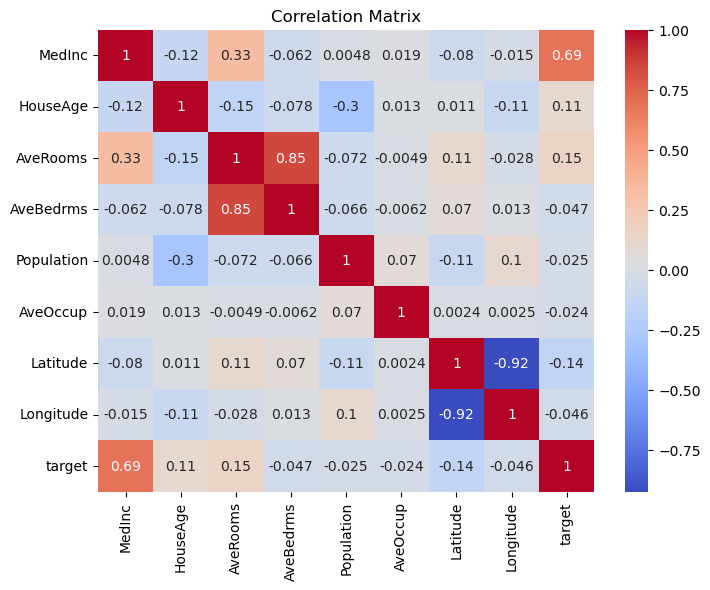

In [89]:
# compute the correlation matrix
corr_matrix = df.corr()

# figure size adjustment - otherwise there is overlap in the values
plt.figure(figsize=(8,6))

# create the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# title
plt.title('Correlation Matrix')

# show the plot
plt.show()

This heatmap shows the key information we need to consider for our regression analysis, firstly when looking at which variables are most correlated with the target value, we can see how strong an indicator the median income is. Upon analyzing the correlation matrix of the dataset, we can observe that latitude and longitude, population and house age, average number of rooms and average bedrooms, as well as average number of rooms and median income, exhibit significant correlation with each other. This could be an issue as strong correlation between variables is a violation of the Gauss-Markov assumptions. 

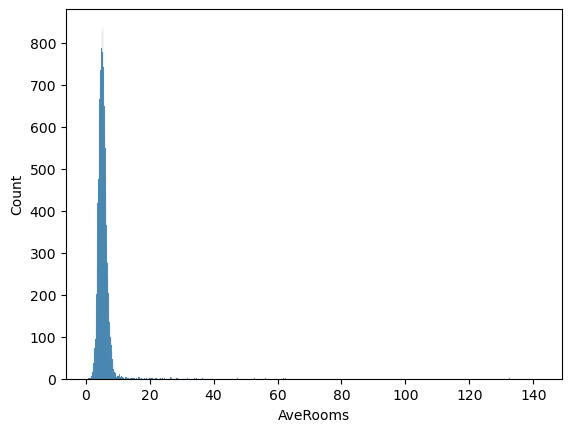

<Figure size 640x480 with 0 Axes>

In [90]:
# Histogram
sns.histplot(x='AveRooms', data=df)

# Display commands
plt.show()
plt.clf()

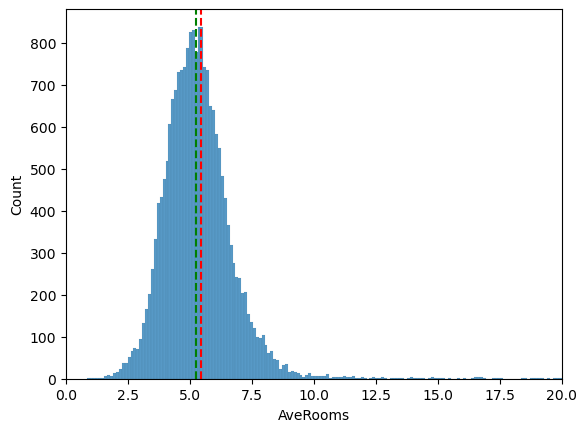

<Figure size 640x480 with 0 Axes>

In [91]:
# Histogram
sns.histplot(x='AveRooms', data=df)

# X limits
plt.xlim(0, 20)

# Vertical lines
plt.axvline(x=df['AveRooms'].mean(), color='red', linestyle='--')
plt.axvline(x=df['AveRooms'].median(), color='green', linestyle='--')

# Display commands
plt.show()
plt.clf()

From this histogram, I have made the decision to drop all rows with values for AveRooms > 10.

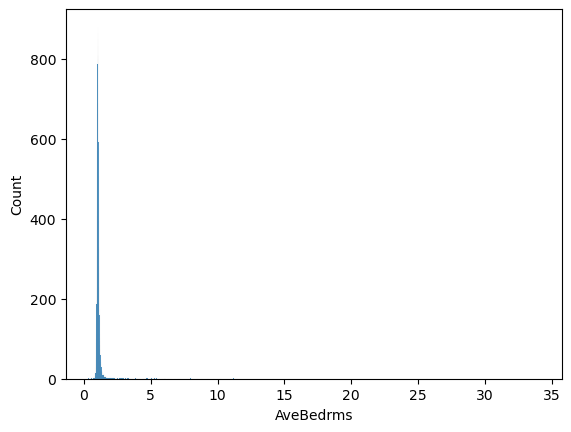

<Figure size 640x480 with 0 Axes>

In [92]:
# Histogram
sns.histplot(x='AveBedrms', data=df)

# Display commands
plt.show()
plt.clf()

This is extremely skewed data for AveBedrms, so we now set some limits on x-axis in the next step.

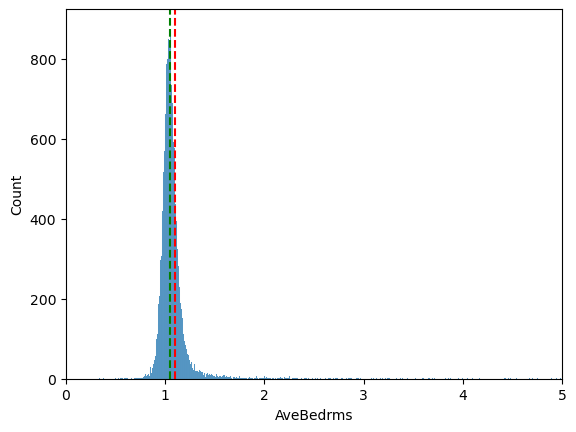

<Figure size 640x480 with 0 Axes>

In [93]:
# Histogram
sns.histplot(x='AveBedrms', data=df)

# X limits
plt.xlim(0, 5)

# Vertical lines
plt.axvline(x=df['AveBedrms'].mean(), color='red', linestyle='--')
plt.axvline(x=df['AveBedrms'].median(), color='green', linestyle='--')

# Display commands
plt.show()
plt.clf()

From the data on this histogram, I have made the decision to drop any rows with the AveBedrms > 5.

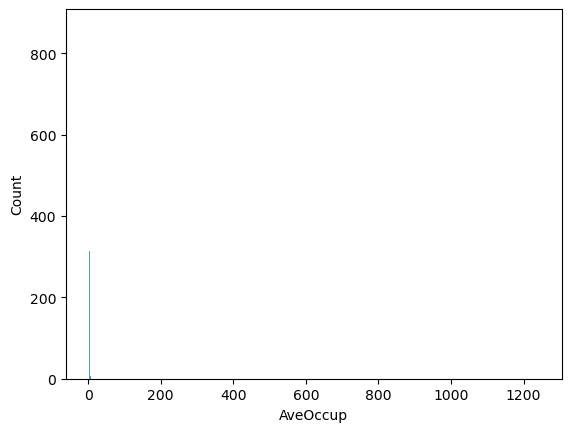

<Figure size 640x480 with 0 Axes>

In [94]:
# Histogram
sns.histplot(x='AveOccup', data=df)

# Display command
plt.show()
plt.clf()

This is ridiculously skewed data for AveOccup, so we now set some limits on x-axis in the next step.

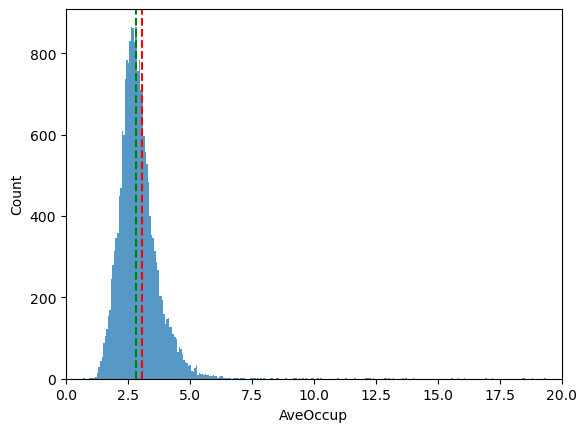

<Figure size 640x480 with 0 Axes>

In [95]:
# Histogram
sns.histplot(x='AveOccup', data=df)

# Vertical lines
plt.axvline(x=df['AveOccup'].mean(), color='red', linestyle='--')
plt.axvline(x=df['AveOccup'].median(), color='green', linestyle='--')

# X limits
plt.xlim(0, 20)

# Display command
plt.show()
plt.clf()

We can now how the data is distributed for the majority of the dataset, therefore on this particular dataset I have decided to drop all rows with AveOccup > 10. 

In [96]:
# Drop the values
df = df.drop(df[(df.AveOccup > 10)|(df.AveBedrms > 5)|(df.AveRooms > 10)].index)

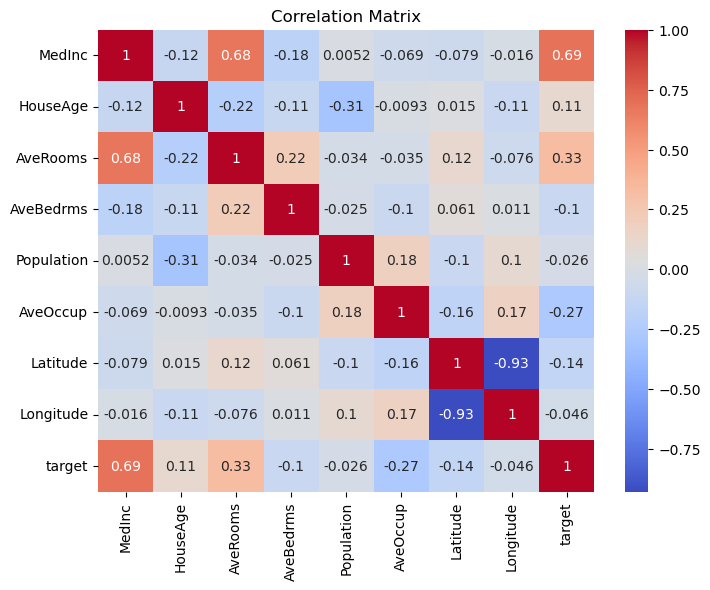

In [97]:
# compute the correlation matrix
corr_matrix = df.corr()

# figure size adjustment - otherwise there is overlap in the values
plt.figure(figsize=(8,6))

# create the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# title
plt.title('Correlation Matrix')

# show the plot
plt.show()

This updated heatmap shows how the steps we have taken to remove outliers have reduced the multicollinearity between variables. In particular, we can see how the correlation between the average number of bedrooms and rooms has significantly decreased. 

## Linear Regression

**Linear regression** is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, meaning that the effect of the independent variables on the dependent variable is a straight line.

In **simple linear regression**, there is one independent variable and one dependent variable. The goal is to find the best-fitting line that describes the relationship between the two variables. This line is called the regression line, and it is defined by the equation:

y = a + bx

where y is the dependent variable, x is the independent variable, b is the slope of the line, and a is the intercept.

The parameters a and b are estimated from the data using the least squares method, which minimizes the sum of the squared residuals (the difference between the actual values of the dependent variable and the predicted values).

In **multiple linear regression**, there are multiple independent variables and one dependent variable. The goal is to find the best-fitting plane (in three dimensions) or hyperplane (in higher dimensions) that describes the relationship between the variables. The equation for the plane or hyperplane is similar to the equation for the regression line, but with additional coefficients for each independent variable.

The **Gauss-Markov** assumptions (or assumptions of the linear regression model) are:

1. **Linearity**: The relationship between the dependent variable and the independent variables is linear.
2. **Independence of errors**: The errors (residuals) are independent of each other, meaning that the value of one error does not depend on the value of any other error.
3. **Homoscedasticity of errors**: The errors have a constant variance across all levels of the independent variables.
4. **No autocorrelation of errors**: The errors are not correlated with each other. In other words, there is no pattern to the errors that can be predicted from previous errors.
5. **No perfect multicollinearity**: The independent variables are not highly correlated with each other, meaning that they are not linearly related to each other.
6. **Normality of errors**: The errors are normally distributed, meaning that they follow a normal distribution with a mean of zero.

These assumptions are important to ensure that the linear regression model is valid and that the estimated coefficients are unbiased and have the minimum variance possible (the **Gauss-Markov theorem**). Violations of these assumptions may lead to biased or inefficient estimates, and may require the use of alternative regression models or estimation techniques.

### Random sampling of the data

We perform this random sampling of the data to speed up the computation, otherwise we would likely to run into both performance and memory issues on the computer. 

In [98]:
df_sample = df.sample(frac=0.1, random_state=100)

### Split the data into training and test sets

In [99]:
X = df_sample.drop('target', axis=1)
y = df_sample['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train the model

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Make predictions

In [101]:
y_pred = lr.predict(X_test)

### Evaluate the model

In [102]:
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination:', r2_score(y_test, y_pred))

Mean squared error: 0.48808287736544104
Coefficient of determination: 0.6107235394792272


We can see how the MSE and R-squared score indicate that our linear regression model is accurate, being able to explain 61% of the variation in our training dataset. However, we still need to run some tests to consider whether the assumptions of the model are being met. 

## Regularization models to fit the data

Regularization methods are regression models which often include an additional constraint in the form of a penalty term. These models are often used to overcome the problem of multicollinearity in the linear model that would otherwise mean the results aren't robust. 

There are three main types of regularization models:
* **Lasso** - Lasso (short for "Least Absolute Shrinkage and Selection Operator") is a regularization technique used in linear regression to prevent overfitting and improve the model's generalization performance. Lasso adds a penalty term to the linear regression function that limits the size of the coefficients, and can shrink them towards zero. The Lasso algorithm can effectively perform feature selection by driving some coefficients exactly to zero, eliminating those features from the model.

$$\text{minimize } \frac{1}{2n} ||y - Xw||_2^2 + \alpha||w||_1$$

* **Ridge** - Ridge regression is a regularization technique used in linear regression to prevent overfitting and improve the model's generalization performance. It is similar to Lasso regression in that it adds a penalty term to the linear regression function, but the penalty term in Ridge is different. Rather than simply limiting the size of the coefficients, Ridge adds a penalty term that is proportional to the squared magnitude of the coefficients.

$$\text{minimize } \frac{1}{2n} ||y - Xw||_2^2 + \alpha||w||_2^2$$

* **Elastic net** - Elastic Net regression is a hybrid regularization technique that combines the strengths of both Lasso and Ridge regression. Like Lasso and Ridge, Elastic Net adds a penalty term to the linear regression function to prevent overfitting and improve the model's generalization performance.

$$\text{minimize } \frac{1}{2n} ||y - Xw||_2^2 + \alpha\rho||w||_1 + \frac{\alpha(1-\rho)}{2}||w||_2^2$$

### Training the models

In [109]:
# create a Lasso model and train it on the training set
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# create a Ridge model and train it on the training set
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# create an Elastic Net model and train it on the training set
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In this section, you will note the two parameters: alpha and the l1_ratio. The `alpha` parameter controls the strength of the regularization, higher values result in stronger regularization which lead to simpler models and coefficients. The `l1_ratio` parameter is only present in the elastic net model because it determines the mixing of the two regularization methods (lasso and ridge). When it is equal to 1, elastic net reduces to lasso, while when it is equal to zero it reduces to ridge. 

### Make predictions and evaluate

In [110]:
# evaluate the models on the testing set
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso MSE:", lasso_mse)

ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge MSE:", ridge_mse)

enet_pred = enet.predict(X_test)
enet_mse = mean_squared_error(y_test, enet_pred)
print("Elastic Net MSE:", enet_mse)

Lasso MSE: 0.5595655256543328
Ridge MSE: 0.48796141108554447
Elastic Net MSE: 0.5157298129910296


In this particular scenario, upon comparing the mean squared error (MSE) of our models to that of the linear model prior, we observed no improvement in predictive performance. This outcome was not unexpected given that our dataset is characterized by a relatively low number of features, thereby suggesting that most of the features are statistically significant. It is worth noting, however, that while regularization techniques may not have been as effective for our current dataset, they remain valuable tools in house price analysis, particularly in high-dimensional data where their constraints can prove especially beneficial in preventing overfitting.